# Imports

In [2]:
%%capture --no-display
!pip install ultralytics
!pip install split-folders
!pip install -U ipywidgets

In [66]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import splitfolders
from IPython.display import display, Image
import pandas as pd

# Training

In [8]:
model = YOLO('yolov8n-cls.pt')

100%|██████████| 5.30M/5.30M [00:00<00:00, 245MB/s]


Splitting Data into Train, Validation & Test

In [9]:
splitfolders.ratio("/kaggle/input/state-farm-distracted-driver-detection/imgs/train", output="output", seed=1337, ratio=(0.7, 0.15, 0.15))

Copying files: 22424 files [04:24, 84.78 files/s] 


In [10]:
results = model.train(data = '/kaggle/working/output', epochs = 10)

Ultralytics YOLOv8.1.47 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/kaggle/working/output, epochs=10, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

2024-04-11 18:13:38.283308: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 18:13:38.283412: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 18:13:38.405541: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=1000 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralyt

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/output/train... 15692 images, 0 corrupt: 100%|██████████| 15692/15692 [00:06<00:00, 2516.32it/s]


train: New cache created: /kaggle/working/output/train.cache


val: Scanning /kaggle/working/output/val... 3358 images, 0 corrupt: 100%|██████████| 3358/3358 [00:01<00:00, 3014.74it/s]

val: New cache created: /kaggle/working/output/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 4 dataloader workers
Logging results to runs/classify/train
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10     0.394G      2.325         16        224:   2%|▏         | 15/981 [00:02<02:14,  7.20it/s]

       1/10     0.394G      2.325         16        224:   3%|▎         | 30/981 [00:04<02:00,  7.92it/s]
100%|██████████| 755k/755k [00:00<00:00, 37.9MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [00:10<00:00,  9.72it/s]

                   all      0.943      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [00:10<00:00,  9.79it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [00:11<00:00,  9.31it/s]

                   all      0.975      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [00:10<00:00,  9.92it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [00:10<00:00,  9.74it/s]


                   all      0.986          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [00:11<00:00,  9.23it/s]

                   all      0.989      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [00:10<00:00,  9.81it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [00:10<00:00,  9.84it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [00:11<00:00,  9.47it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.327G    0.07225         12        224: 100%|██████████| 981/981 [01:14<00:00, 13.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [00:10<00:00,  9.86it/s]

                   all      0.992          1



10 epochs completed in 0.241 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n-cls summary (fused): 73 layers, 1447690 parameters, 0 gradients, 3.3 GFLOPs
train: /kaggle/working/output/train... found 15692 images in 10 classes ✅ 
val: /kaggle/working/output/val... found 3358 images in 10 classes ✅ 
test: /kaggle/working/output/test... found 3374 images in 10 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [00:11<00:00,  9.52it/s]


                   all      0.993          1
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


# Predicting

In [13]:
model.val()

Ultralytics YOLOv8.1.47 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n-cls summary (fused): 73 layers, 1447690 parameters, 0 gradients, 3.3 GFLOPs
train: /kaggle/working/output/train... found 15692 images in 10 classes ✅ 
val: /kaggle/working/output/val... found 3358 images in 10 classes ✅ 
test: /kaggle/working/output/test... found 3374 images in 10 classes ✅ 


val: Scanning /kaggle/working/output/val... 3358 images, 0 corrupt: 100%|██████████| 3358/3358 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 210/210 [00:12<00:00, 17.26it/s]


                   all      0.993          1
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x796e273782e0>
curves: []
curves_results: []
fitness: 0.9965753257274628
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9931506514549255, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9965753257274628}
save_dir: PosixPath('runs/classify/train2')
speed: {'preprocess': 0.10585280810884949, 'inference': 0.5995943973716203, 'loss': 0.0009657443457234821, 'postprocess': 0.0009412492862267463}
task: 'classify'
top1: 0.9931506514549255
top5: 1.0

In [14]:
df = pd.read_csv("/kaggle/working/runs/classify/train/results.csv")
df.head()

epoch             train/loss  metrics/accuracy_top1  \
0                      1                1.30750                0.94312   
1                      2                0.35195                0.97767   
2                      3                0.23658                0.97469   
3                      4                0.19314                0.98571   
4                      5                0.14152                0.98600   

   metrics/accuracy_top5               val/loss                 lr/pg0  \
0                0.99911                 1.5533               0.000238   
1                0.99970                 1.4977               0.000429   
2                0.99940                 1.4946               0.000572   
3                0.99970                 1.4817               0.000502   
4                0.99970                 1.4778               0.000431   

                  lr/pg1                 lr/pg2  
0               0.000238               0.000238  
1               0.000429               0.000429  
2               0.000572               0.000572  
3               0.000502               0.000502  
4               0.000431               0.000431

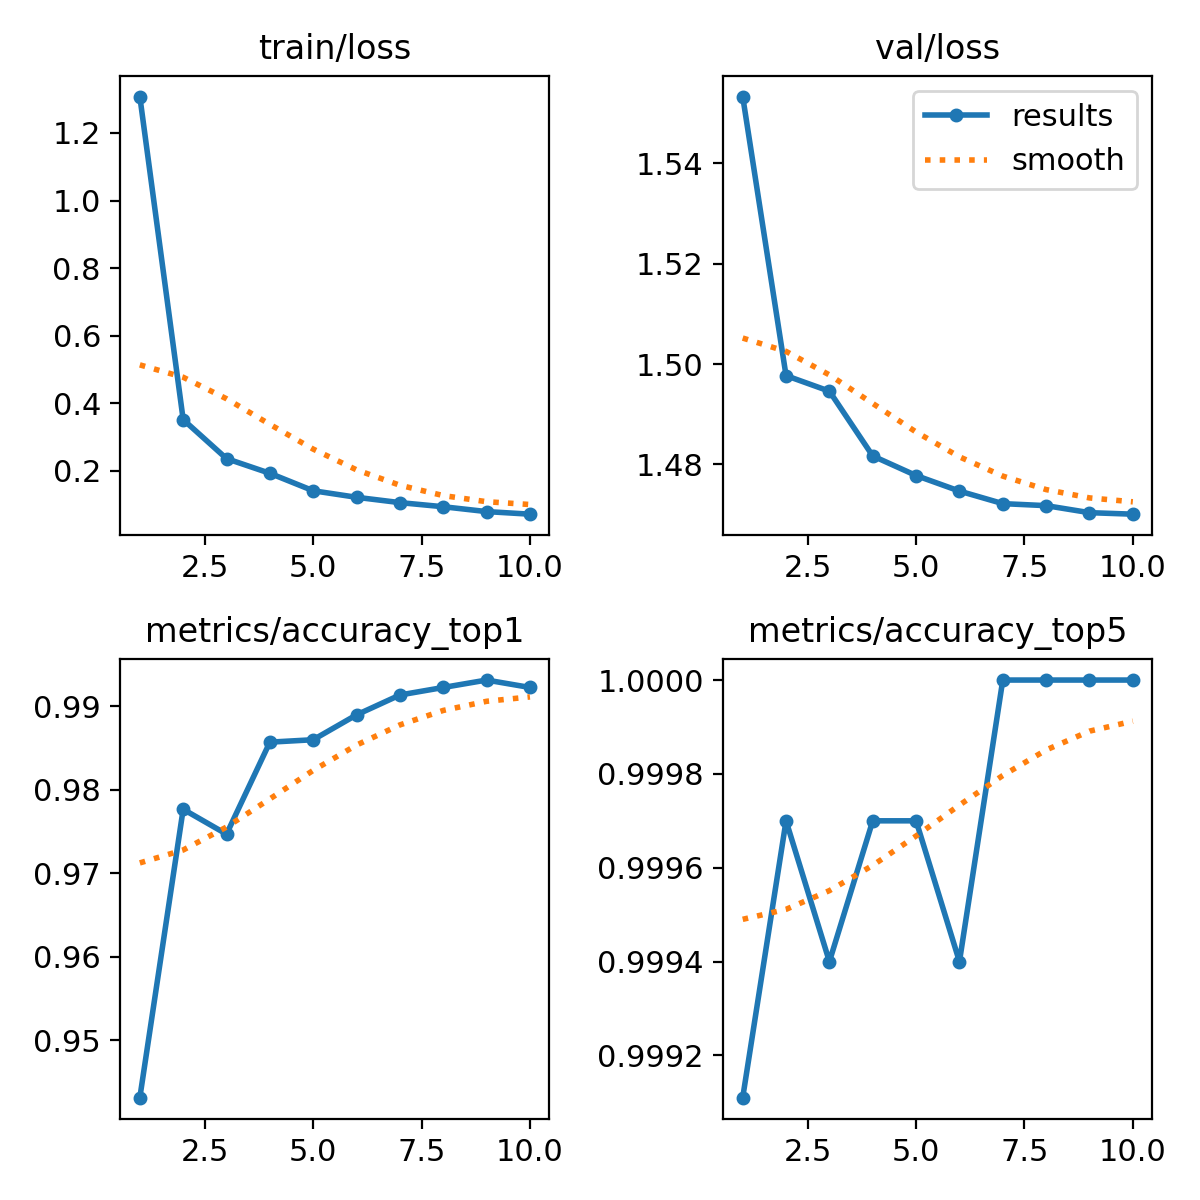

In [51]:
Image("/kaggle/working/runs/classify/train/results.png")

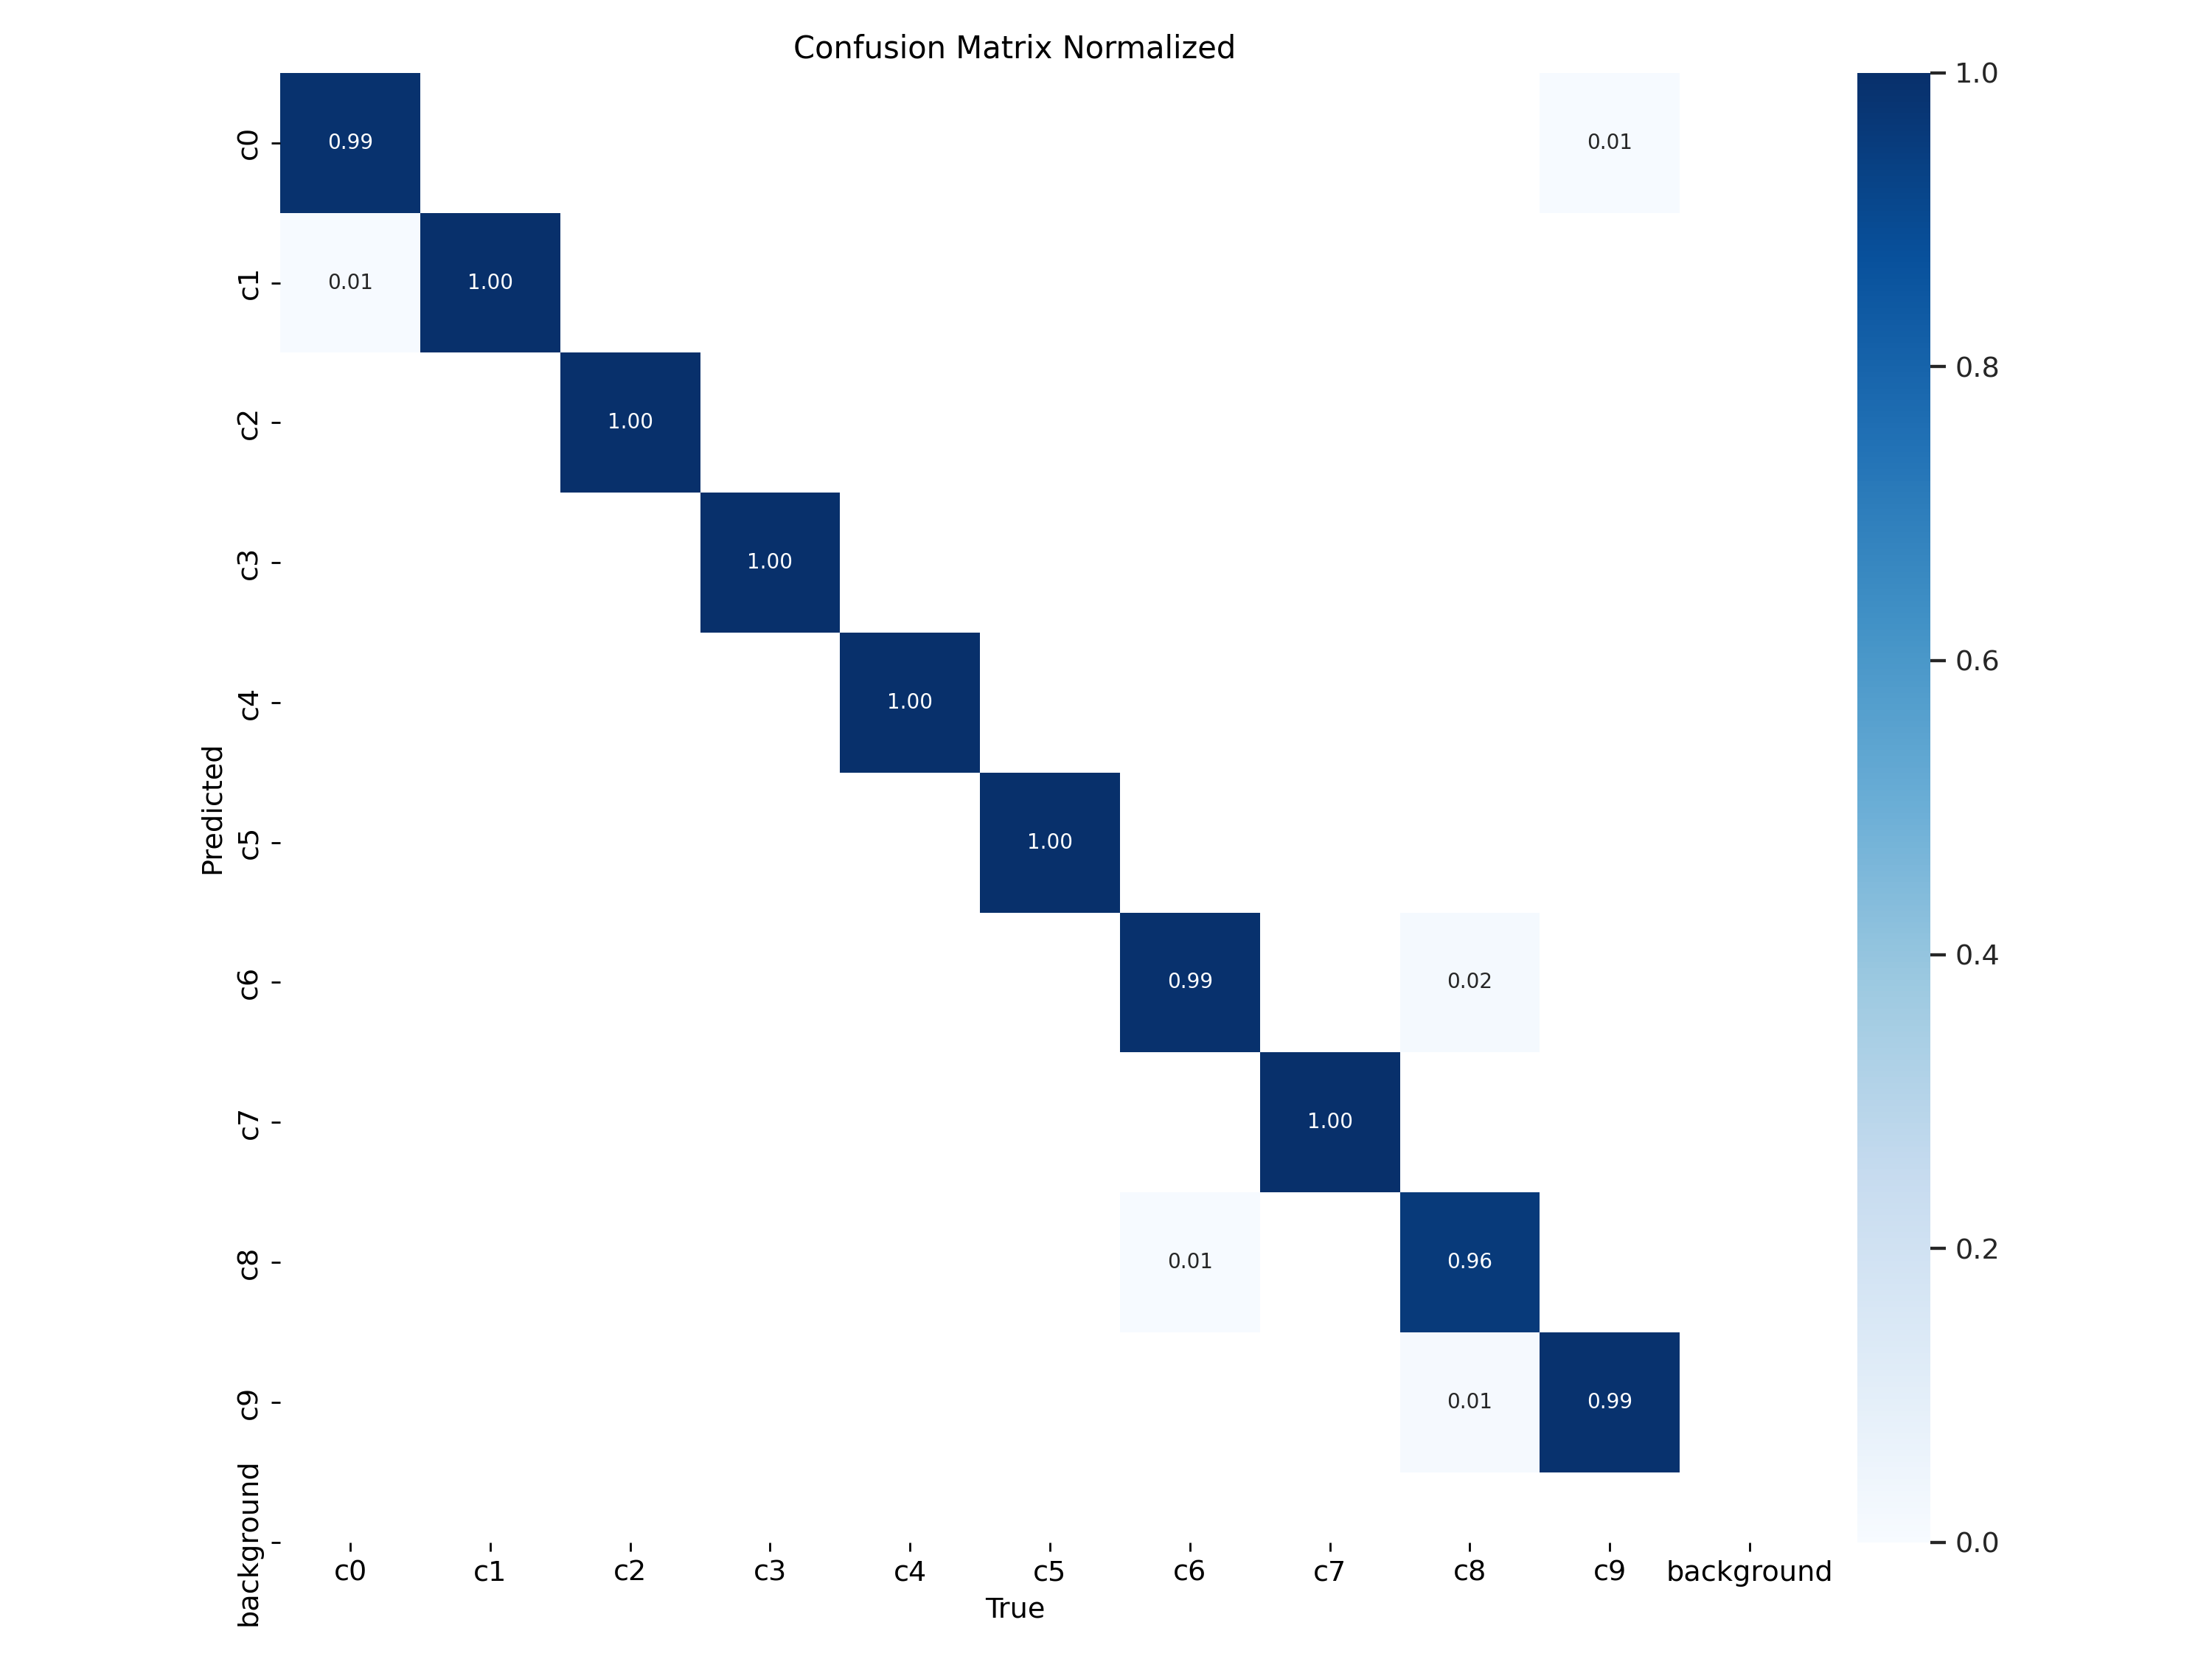

In [52]:
Image("/kaggle/working/runs/classify/train/confusion_matrix_normalized.png")

In [67]:
path = "/kaggle/input/state-farm-distracted-driver-detection/imgs/test/"
model_weights = "/kaggle/working/runs/classify/train/weights/best.pt"
pred = [(path+i,model.predict(path+i, model = model_weights)[0].probs.top1) for i in os.listdir(path)[:45]]


image 1/1 /kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_96590.jpg: 224x224 c8 1.00, c9 0.00, c6 0.00, c0 0.00, c4 0.00, 5.5ms
Speed: 7.5ms preprocess, 5.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_32366.jpg: 224x224 c5 1.00, c8 0.00, c3 0.00, c0 0.00, c9 0.00, 3.2ms
Speed: 4.5ms preprocess, 3.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_99675.jpg: 224x224 c6 0.99, c8 0.00, c9 0.00, c1 0.00, c2 0.00, 2.8ms
Speed: 4.6ms preprocess, 2.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_85937.jpg: 224x224 c5 0.50, c9 0.50, c8 0.00, c3 0.00, c1 0.00, 2.8ms
Speed: 4.5ms preprocess, 2.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /kaggle/input

In [68]:
labels = {
    0: 'normal driving',
1: 'texting - right',
2: 'talking on the phone - right',
3: 'texting - left',
4: 'talking on the phone - left',
5: 'operating the radio',
6: 'drinking',
7: 'reaching behind',
8: 'hair and makeup',
9: 'talking to passenger'}

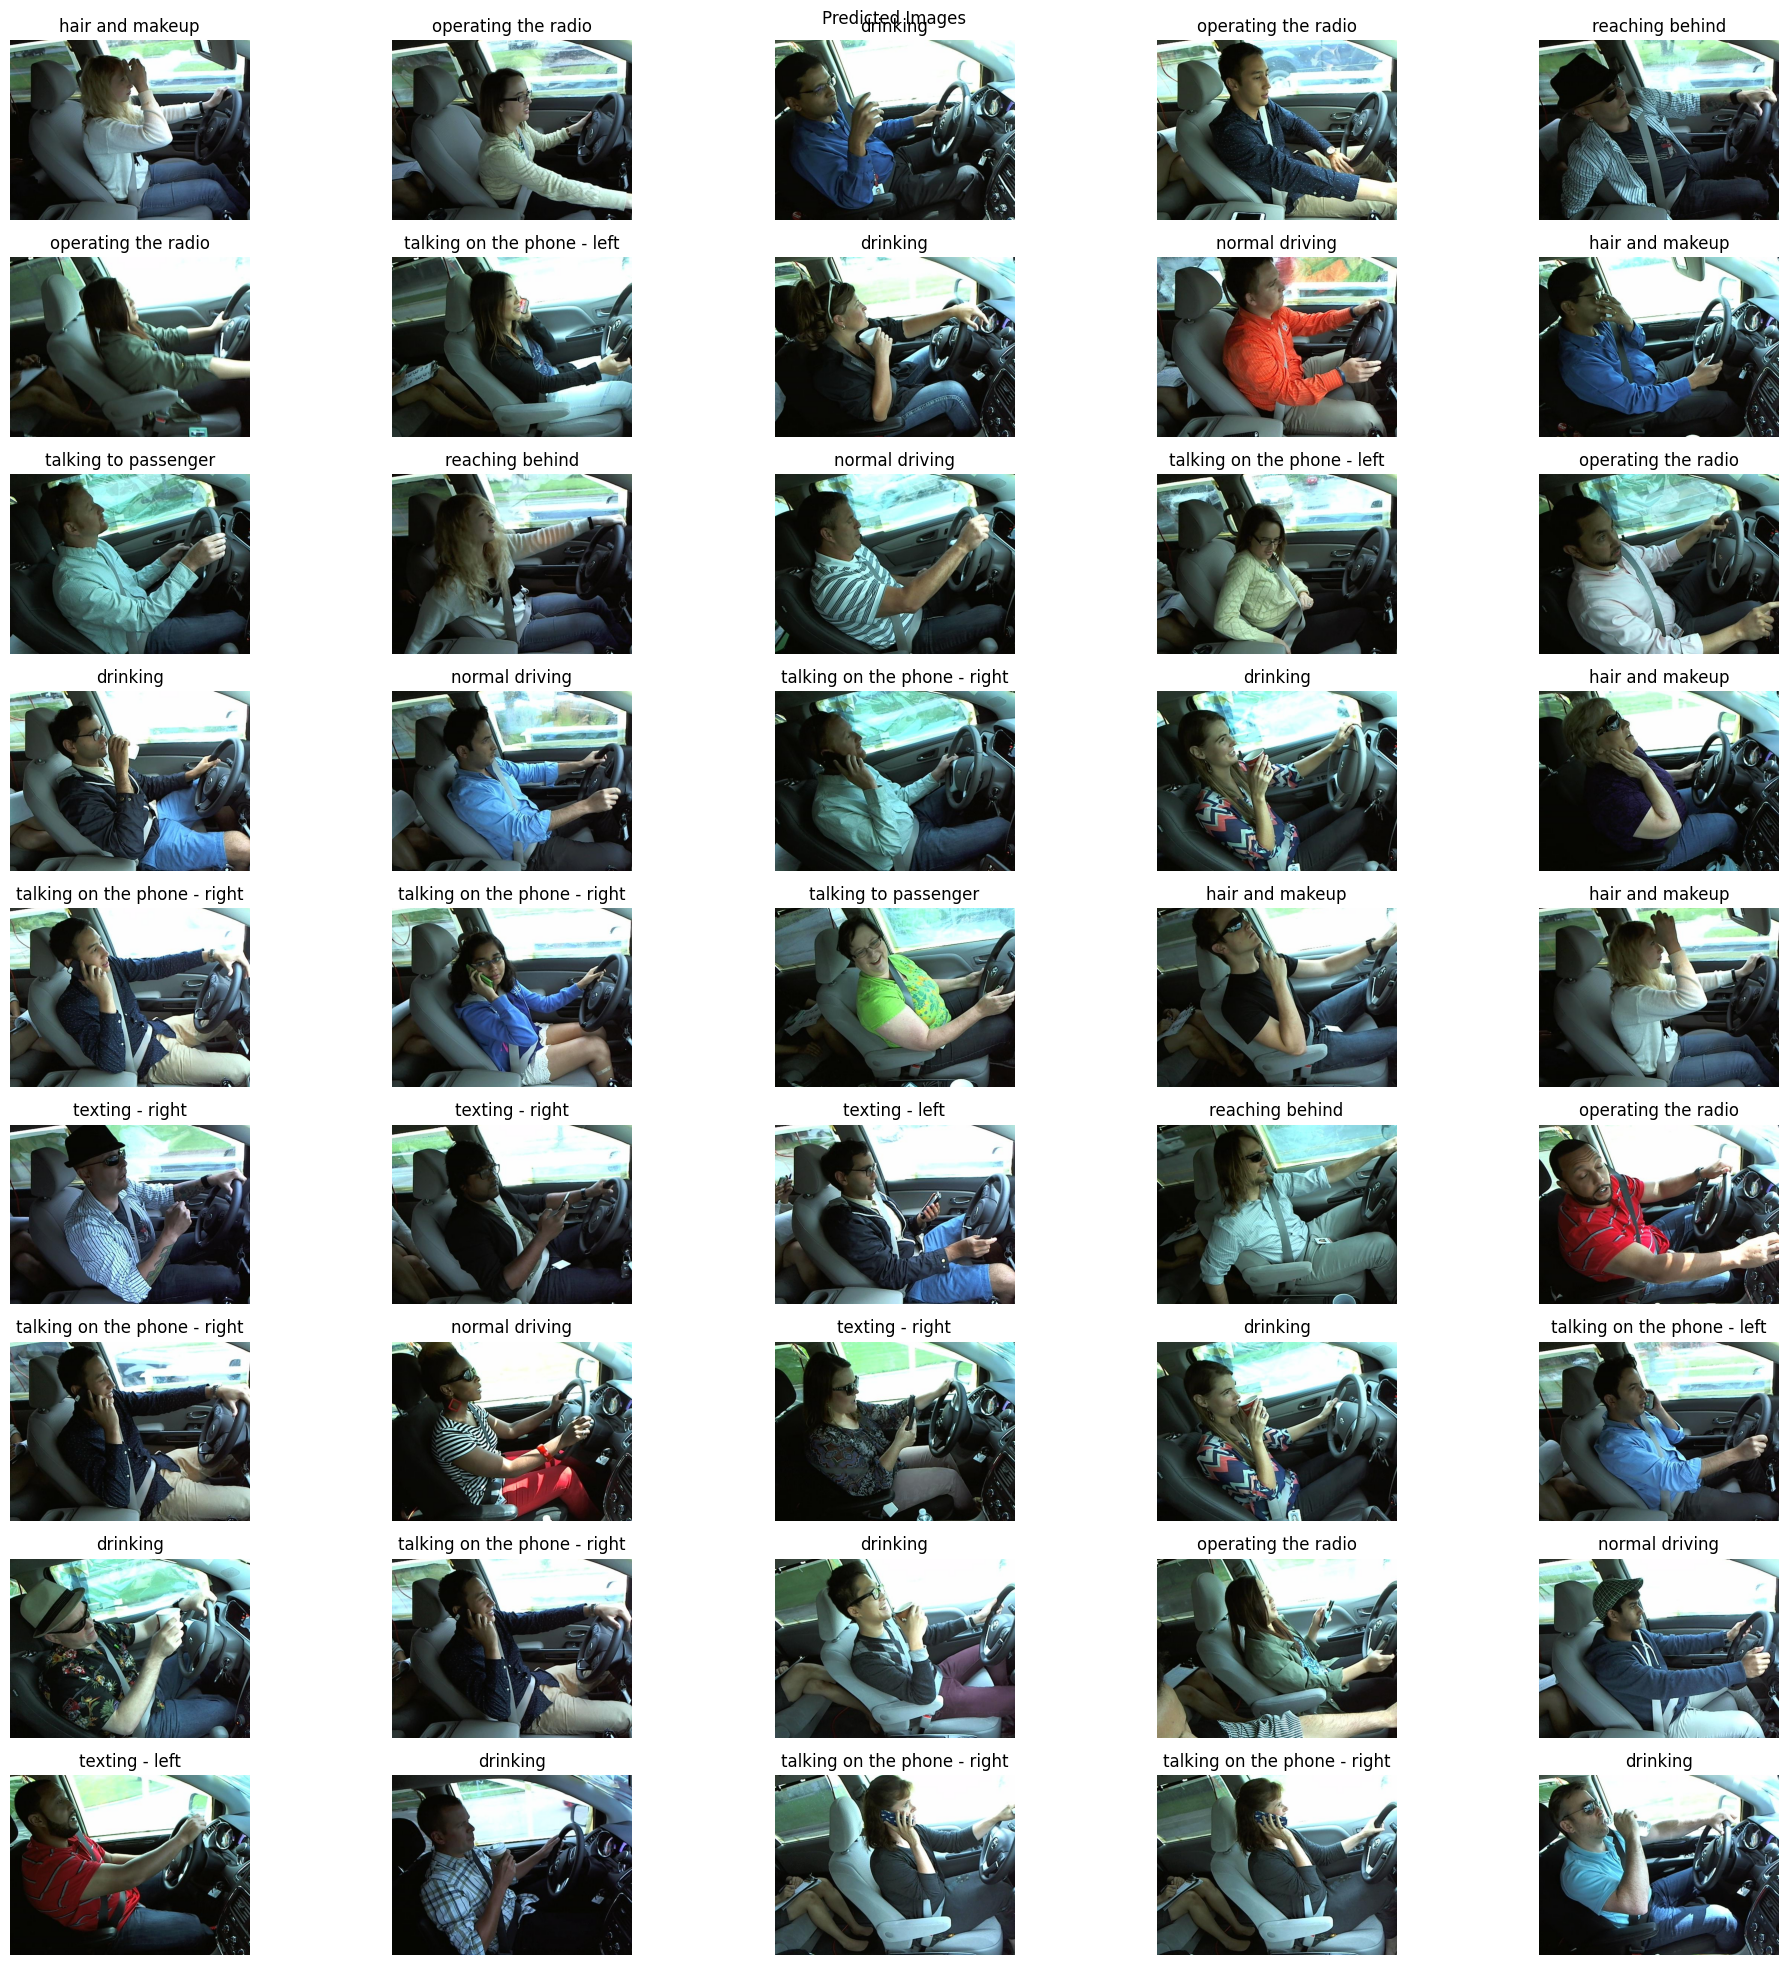

In [72]:
rows = 9
cols = 5
fig, ax = plt.subplots(rows, cols, figsize=(20, 20))
for i, (img, label) in enumerate(pred):
    row = i // cols
    col = i % cols
    ax[row, col].imshow(plt.imread(img))
    ax[row, col].set_title(labels.get(label))
    ax[row, col].axis('off')

plt.suptitle("Predicted Images")
plt.tight_layout()
plt.show()